In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
#functions for plotting
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, labels, label=True, ax=None):
    ax = ax or plt.gca()
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolors='black')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, edgecolors='black')
    plt.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
def plot_kmeans(kmeans, X, labels, n_clusters=4, rseed=0, ax=None):
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolors='black')

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

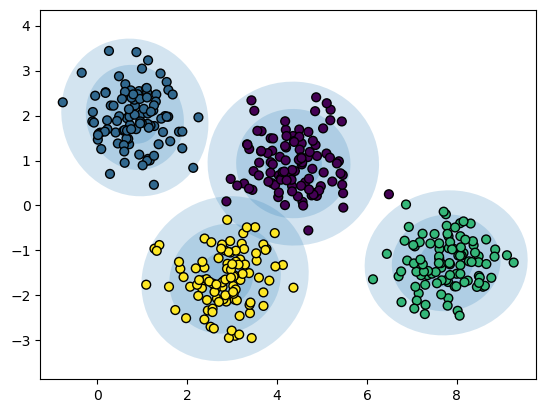

In [3]:
#generate artificial blobs 
n_classes = 4
X, y_true = make_blobs(n_samples=400, centers=n_classes, cluster_std=0.60, random_state=0)
X = np.fliplr(X) #flip axes for best plots

#compute GMM for the dataset
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit(X).predict(X) #estimate the parameters with EM approach and use them to predict labels
plot_gmm(gmm, X, labels)

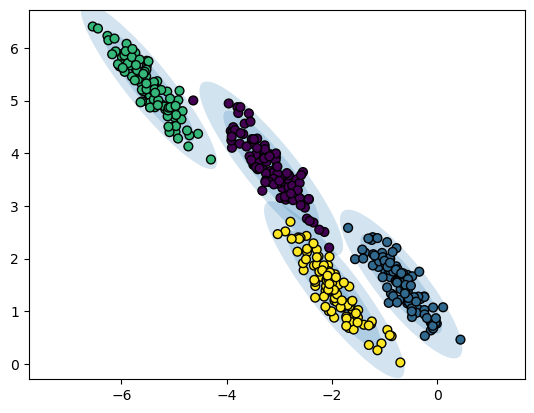

In [4]:
#compute GMM for the stretched version of the dataset
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit(X_stretched).predict(X_stretched)
plot_gmm(gmm, X_stretched, labels_gmm)

In [6]:
#for each point, compute the probability that comes from the different Gaussians
probs = gmm.predict_proba(X_stretched)
print(probs[0].round(3))
print("\n")
print(probs[120:125].round(3))

[0.575 0.    0.425 0.   ]


[[0.125 0.869 0.    0.006]
 [0.034 0.    0.    0.966]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]]


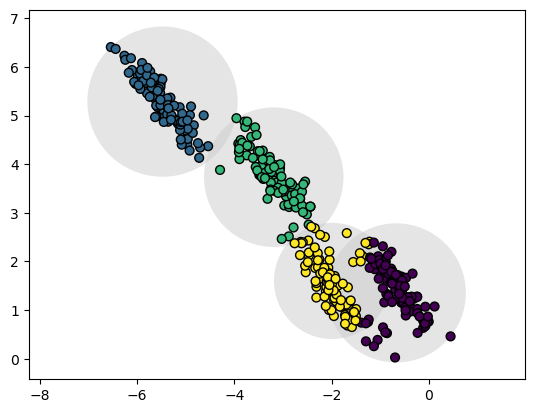

In [7]:
#compute k-means on the dataset: note the differences...
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X_stretched)
plot_kmeans(kmeans, X_stretched, labels_kmeans)